### Task Structured Tabular Data:

#### Dataset Link:
Dataset can be found at " /data/structured_data/data.csv " in the respective challenge's repo.

#### Description:
Tabular data is usually given in csv format (comma-separated-value). CSV files can be read and manipulated using pandas and numpy library in python. Most common datatypes in structured data are 'numerical' and 'categorical' data. Data processing is required to handle missing values, inconsistent string formats, missing commas, categorical variables and other different kinds of data inadequacies that you will get to experience in this course. 

#### Objective:
How to process and manipulate basic structured data for machine learning (Check out helpful links section to get hints)

#### Tasks:
- Load the csv file (pandas.read_csv function)
- Classify columns into two groups - numerical and categorical. Print column names for each group.
- Print first 10 rows after handling missing values
- One-Hot encode the categorical data
- Standarize or normalize the numerical columns

#### Ask yourself:

- Why do we need feature encoding and scaling techniques?
- What is ordinal data and should we one-hot encode ordinal data? Are any better ways to encode it?
- What's the difference between normalization and standardization? Which technique is most suitable for this sample dataset?
- Can you solve the level-up challenge: Complete all the above tasks without using scikit-learn library ?

#### Helpful Links:
- Nice introduction to handle missing values: https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/
- Scikit-learn documentation for one hot encoding: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
- Difference between normalization and standardization: https://medium.com/towards-artificial-intelligence/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

In [178]:
# Import the required libraries
# Use terminal commands like "pip install numpy" to install packages
import numpy as np
import pandas as pd
# import sklearn if and when required

In [179]:
df = pd.read_csv("data/structured_data/data.csv ")
df.head(10)

Country   Age   Salary Purchased  Price Category Of Purchase
0   France  44.0  72000.0        No                           1
1    Spain  27.0  48000.0       Yes                           1
2  Germany  30.0  54000.0        No                           2
3    Spain  38.0  61000.0        No                           3
4  Germany  40.0      NaN       Yes                           1
5   France  35.0  58000.0       Yes                           2
6    Spain   NaN  52000.0        No                           3
7   France  48.0  79000.0       Yes                           1
8  Germany  50.0  83000.0        No                           2
9   France  37.0  67000.0       Yes                           2

### Getting the shape and stats about the data

In [180]:
df.shape

(20, 5)

In [181]:
df.describe()

Age        Salary  Price Category Of Purchase
count  18.000000     17.000000                   20.000000
mean   34.222222  60364.705882                    2.000000
std     9.194343  11799.202366                    0.858395
min    18.000000  41000.000000                    1.000000
25%    27.250000  54000.000000                    1.000000
50%    35.000000  58800.000000                    2.000000
75%    39.500000  67000.000000                    3.000000
max    50.000000  83000.000000                    3.000000

### Classifying numerical and categorical

In [182]:
categorical_df = df.select_dtypes(exclude=[np.number])
categorical.head(10)

Country Purchased
0   France        No
1    Spain       Yes
2  Germany        No
3    Spain        No
4  Germany       Yes
5   France       Yes
6    Spain        No
7   France       Yes
8  Germany        No
9   France       Yes

In [183]:
numerical_df = df.select_dtypes(include=[np.number])
numerical_df.head(10)

Age   Salary  Price Category Of Purchase
0  44.0  72000.0                           1
1  27.0  48000.0                           1
2  30.0  54000.0                           2
3  38.0  61000.0                           3
4  40.0      NaN                           1
5  35.0  58000.0                           2
6   NaN  52000.0                           3
7  48.0  79000.0                           1
8  50.0  83000.0                           2
9  37.0  67000.0                           2

### Finding missing data

In [184]:
numerical_df.isna()

Age  Salary  Price Category Of Purchase
0   False   False                       False
1   False   False                       False
2   False   False                       False
3   False   False                       False
4   False    True                       False
5   False   False                       False
6    True   False                       False
7   False   False                       False
8   False   False                       False
9   False   False                       False
10  False   False                       False
11  False   False                       False
12   True   False                       False
13  False   False                       False
14  False   False                       False
15  False   False                       False
16  False   False                       False
17  False   False                       False
18  False    True                       False
19  False    True                       False

In [185]:
numerical_df.isna().sum()

Age                           2
Salary                        3
Price Category Of Purchase    0
dtype: int64

In [186]:
categorical_df.isna()

Country  Purchased
0     False      False
1     False      False
2     False      False
3     False      False
4     False      False
5     False      False
6     False      False
7     False      False
8     False      False
9     False      False
10    False      False
11    False      False
12    False      False
13    False      False
14    False      False
15    False      False
16    False      False
17    False      False
18    False      False
19    False      False

In [187]:
categorical_df.isna().sum()

Country      0
Purchased    0
dtype: int64

###  Handling missing data

In [188]:
numerical_df.fillna(axis = 0 , method = "ffill",inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [189]:
numerical_df.isna()

Age  Salary  Price Category Of Purchase
0   False   False                       False
1   False   False                       False
2   False   False                       False
3   False   False                       False
4   False   False                       False
5   False   False                       False
6   False   False                       False
7   False   False                       False
8   False   False                       False
9   False   False                       False
10  False   False                       False
11  False   False                       False
12  False   False                       False
13  False   False                       False
14  False   False                       False
15  False   False                       False
16  False   False                       False
17  False   False                       False
18  False   False                       False
19  False   False                       False

In [190]:
numerical_df.isna().sum()

Age                           0
Salary                        0
Price Category Of Purchase    0
dtype: int64

### Encoding categorical data

In [191]:
country_oneHot = pd.get_dummies(categorical_df.Country, columns = ["Country"])
purchased_oneHot = pd.get_dummies(categorical_df.Purchased,prefix=["Purchased"],columns = ["Purchased"])

In [192]:
country_oneHot.head(10)

France  Germany  Spain
0       1        0      0
1       0        0      1
2       0        1      0
3       0        0      1
4       0        1      0
5       1        0      0
6       0        0      1
7       1        0      0
8       0        1      0
9       1        0      0

In [193]:
purchased_oneHot.head(10)

['Purchased']_No  ['Purchased']_Yes
0                 1                  0
1                 0                  1
2                 1                  0
3                 1                  0
4                 0                  1
5                 0                  1
6                 1                  0
7                 0                  1
8                 1                  0
9                 0                  1

## Performing operations on numerical data

In [194]:
numerical_df.head(10)

Age   Salary  Price Category Of Purchase
0  44.0  72000.0                           1
1  27.0  48000.0                           1
2  30.0  54000.0                           2
3  38.0  61000.0                           3
4  40.0  61000.0                           1
5  35.0  58000.0                           2
6  35.0  52000.0                           3
7  48.0  79000.0                           1
8  50.0  83000.0                           2
9  37.0  67000.0                           2

In [195]:
numerical_df.shape

(20, 3)

### Transpose the dataset

In [196]:
numerical_df_t = numerical_df.T
numerical_df_t.head()

0        1        2        3        4  \
Age                            44.0     27.0     30.0     38.0     40.0   
Salary                      72000.0  48000.0  54000.0  61000.0  61000.0   
Price Category Of Purchase      1.0      1.0      2.0      3.0      1.0   

                                  5        6        7        8        9  \
Age                            35.0     35.0     48.0     50.0     37.0   
Salary                      58000.0  52000.0  79000.0  83000.0  67000.0   
Price Category Of Purchase      2.0      3.0      1.0      2.0      2.0   

                                 10       11       12       13       14  \
Age                            18.0     22.0     22.0     28.0     24.0   
Salary                      54400.0  55000.0  58800.0  42000.0  41000.0   
Price Category Of Purchase      3.0      3.0      1.0      3.0      2.0   

                                 15       16       17       18       19  
Age                            35.0     32.0     38.0     45.0     25.0  
Salary                      69000.0  67000.0  65000.0  65000.0  65000.0  
Price Category Of Purchase      1.0      3.0      3.0      2.0      1.0

In [197]:
numerical_df_t.shape

(3, 20)

In [198]:
numerical_df_t.describe()

0             1             2             3            4   \
count      3.000000      3.000000      3.000000      3.000000      3.00000   
mean   24015.000000  16009.333333  18010.666667  20347.000000  20347.00000   
std    41556.234562  27704.733067  31167.680076  35206.535089  35206.53614   
min        1.000000      1.000000      2.000000      3.000000      1.00000   
25%       22.500000     14.000000     16.000000     20.500000     20.50000   
50%       44.000000     27.000000     30.000000     38.000000     40.00000   
75%    36022.000000  24013.500000  27015.000000  30519.000000  30520.00000   
max    72000.000000  48000.000000  54000.000000  61000.000000  61000.00000   

                 5             6             7             8             9   \
count      3.000000      3.000000      3.000000      3.000000      3.000000   
mean   19345.666667  17346.000000  26349.666667  27684.000000  22346.333333   
std    33475.638699  30011.248608  45596.532240  47905.067248  38671.213665   
min        2.000000      3.000000      1.000000      2.000000      2.000000   
25%       18.500000     19.000000     24.500000     26.000000     19.500000   
50%       35.000000     35.000000     48.000000     50.000000     37.000000   
75%    29017.500000  26017.500000  39524.000000  41525.000000  33518.500000   
max    58000.000000  52000.000000  79000.000000  83000.000000  67000.000000   

                 10            11            12            13            14  \
count      3.000000      3.000000      3.000000      3.000000      3.000000   
mean   18140.333333  18341.666667  19607.666667  14010.333333  13675.333333   
std    31401.793362  31747.049348  33941.557924  24239.765600  23663.858040   
min        3.000000      3.000000      1.000000      3.000000      2.000000   
25%       10.500000     12.500000     11.500000     15.500000     13.000000   
50%       18.000000     22.000000     22.000000     28.000000     24.000000   
75%    27209.000000  27511.000000  29411.000000  21014.000000  20512.000000   
max    54400.000000  55000.000000  58800.000000  42000.000000  41000.000000   

                 15            16            17            18            19  
count      3.000000      3.000000      3.000000      3.000000      3.000000  
mean   23012.000000  22345.000000  21680.333333  21682.333333  21675.333333  
std    39826.779897  38672.367124  37515.935898  37514.205927  37520.263863  
min        1.000000      3.000000      3.000000      2.000000      1.000000  
25%       18.000000     17.500000     20.500000     23.500000     13.000000  
50%       35.000000     32.000000     38.000000     45.000000     25.000000  
75%    34517.500000  33516.000000  32519.000000  32522.500000  32512.500000  
max    69000.000000  67000.000000  65000.000000  65000.000000  65000.000000

### Finding inverse of the matrix

In [245]:
from numpy.linalg import inv
numerical_df_inverse = inv(np.array(numerical_df_values.loc[:2]))
numerical_df_inverse

array([[ 3.04347826e-01, -6.52173913e-01,  1.73913043e-01],
       [-1.73913043e-04,  4.20289855e-04, -1.23188406e-04],
       [ 1.30434783e-01, -1.56521739e+00,  1.21739130e+00]])

In [246]:
np.dot(numerical_df_inverse,numerical_df.loc[:2])

array([[ 1.00000000e+00, -5.70610226e-12, -2.22044605e-16],
       [ 3.41523684e-18,  1.00000000e+00,  1.62630326e-19],
       [-9.32587341e-15, -1.66160419e-11,  1.00000000e+00]])

## Visaulizing the numerical data

In [247]:
numerical_df.head()

Age   Salary  Price Category Of Purchase
0  44.0  72000.0                           1
1  27.0  48000.0                           1
2  30.0  54000.0                           2
3  38.0  61000.0                           3
4  40.0  61000.0                           1

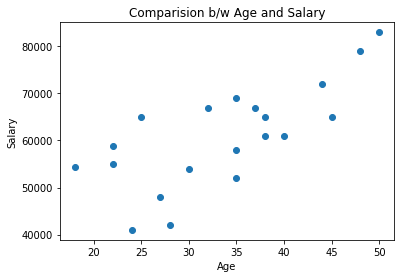

<Figure size 432x288 with 0 Axes>

In [308]:
import matplotlib.pyplot as plt
%matplotlib inline

x = numerical_df.Age
y = numerical_df.Salary

plt.title("Comparision b/w Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")

plt.scatter(x,y)
plt.show()
plt.savefig("Test.png")

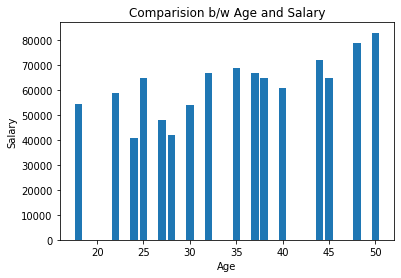

In [276]:
plt.title("Comparision b/w Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")

plt.bar(x,y)
plt.show()

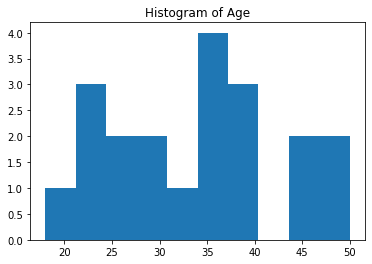

In [275]:
plt.title("Histogram of Age")
plt.hist(x,bins=10)
plt.show()

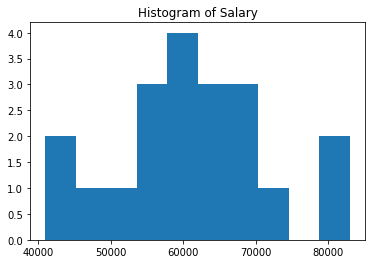

In [274]:
plt.title("Histogram of Salary")
plt.hist(y,bins=10)
plt.show()

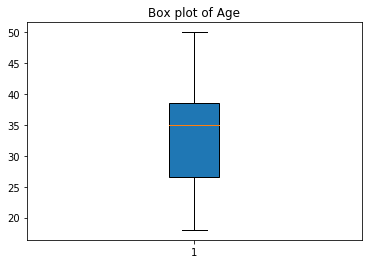

In [273]:
plt.title("Box plot of Age")
plt.boxplot(x,vert=True,patch_artist=True)
plt.show()

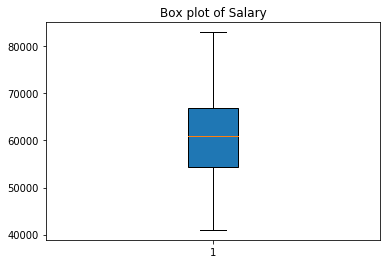

In [272]:
plt.title("Box plot of Salary")
plt.boxplot(y,vert=True,patch_artist=True)
plt.show()

([<matplotlib.patches.Wedge at 0x2ae5fc93208>,
 [Text(1.0606601717798214, 1.0606601717798214, 'less than 25'),
  Text(-0.7778174593052025, -0.7778174593052023, 'greater than 25')],
 [Text(0.7071067811865476, 0.7071067811865476, '25.0%'),
  Text(-0.4242640687119286, -0.42426406871192845, '75.0%')])

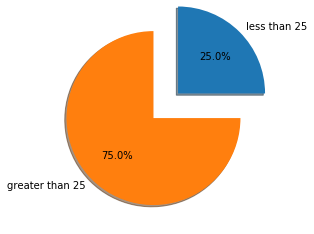

In [307]:
x = (numerical_df.Age.values<=25).sum()
y = (numerical_df.Age.values>25).sum()

sizes = [x,y]
labels = ["less than 25","greater than 25"]
explode = [0.4 , 0]


plt.pie(sizes,explode = explode ,labels=labels,autopct='%1.1f%%', shadow = True)

In [319]:
import pickle
filename = 'test.pkl'
outfile = open(filename,'wb')
pickle.dump(numerical_df,outfile)
outfile.close()

In [321]:
infile = open('test.pkl','rb')
new_dict = pickle.load(infile, encoding='bytes')